In [1]:
from DataManipulation.DataHandler import  mergeMonths, DemaMinDayMultinom

import pandas as pd
from torch.utils.data import ConcatDataset
#data = mergePeriod(1,4,beg="DAT_ASCII_EURUSD_M1_2021",dir="./eurusd2021/",dump=False)
data2021 = mergeMonths(start=1, end=9,beg="DAT_ASCII_EURUSD_M1_2021",dir = './Data/eurusd2021/', dump=False)

dir = "./Data/"
beg = "DAT_ASCII_EURUSD_M1_"
#year = 2020
#data2020 = pd.read_csv(dir+beg+str(year)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']) 
#year = 2019
#data2019 = pd.read_csv(dir+beg+str(year)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']) 
years = range(2010,2021)
dataY = []
for y in years:
    dataY.append(pd.read_csv(dir+beg+str(y)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']))
dataY.append(data2021)
data = pd.concat(dataY)
data.index.name = "Date"
data.index = pd.to_datetime(data.index)

dc = data.copy()
emaperiods = [60*2,60*3,60*5,60*7,60*24*100,60*24*200]
dataset = DemaMinDayMultinom(dc,emaperiods = emaperiods)
print([x.__name__ for x in dataset.indicators])
#validEntries = dataset.raw.dropna()
predictorNames = dataset.periodDiffNames #[x.__name__+"D1" for x in dataset.indicators]+[x.__name__+"D2" for x in dataset.indicators]
ResponseName = "_y_enter_exit"

29.575491428375244
2.4697892665863037
2.4643263816833496
['dema9', 'ema120', 'ema180', 'ema300', 'ema420', 'ema144000', 'ema288000']


In [168]:
dataH = data.resample('1H').agg({'Open': 'first', 
                        'High': 'max', 
                        'Low': 'min', 
                        'Close': 'last'}).dropna()
print(len(dataH),len(data))
dHc = dataH.copy()
emaperiods = [100,200,300,24*100,24*200]
dataHset = DemaMinDayMultinom(dHc,emaperiods = emaperiods)

73065 4330453
9.204226970672607
0.1237955093383789
0.02516484260559082


In [171]:
import pandas as pd
inds = pd.isnull(dataHset.raw).any(1).to_numpy().nonzero()[0]
print(len(inds),len(dataHset.raw))


4802 73065


In [172]:
[x.__name__ for x in dataHset.indicators]

['dema9', 'ema100', 'ema200', 'ema300', 'ema2400', 'ema4800']

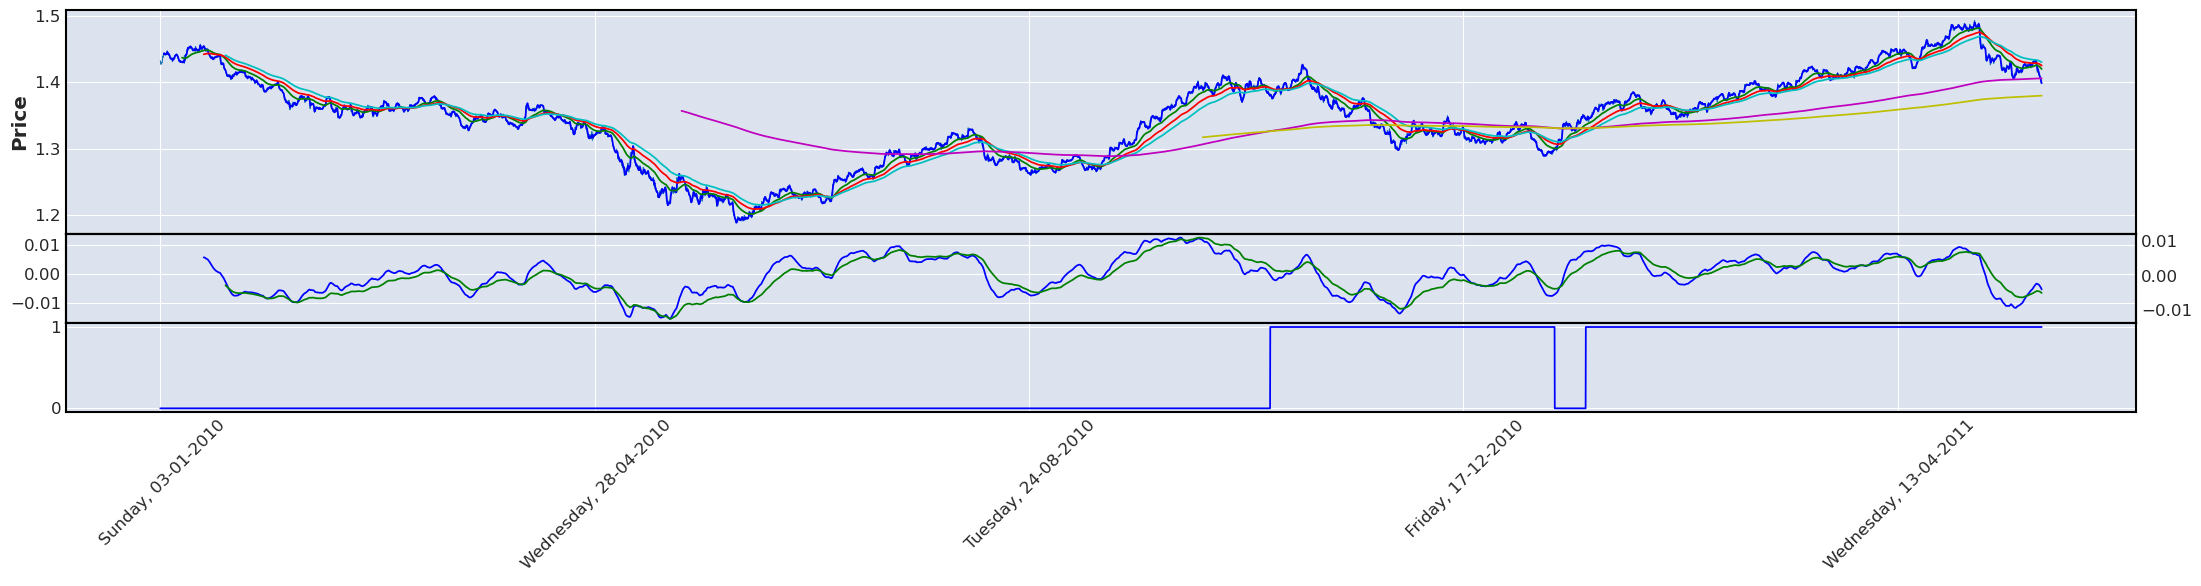

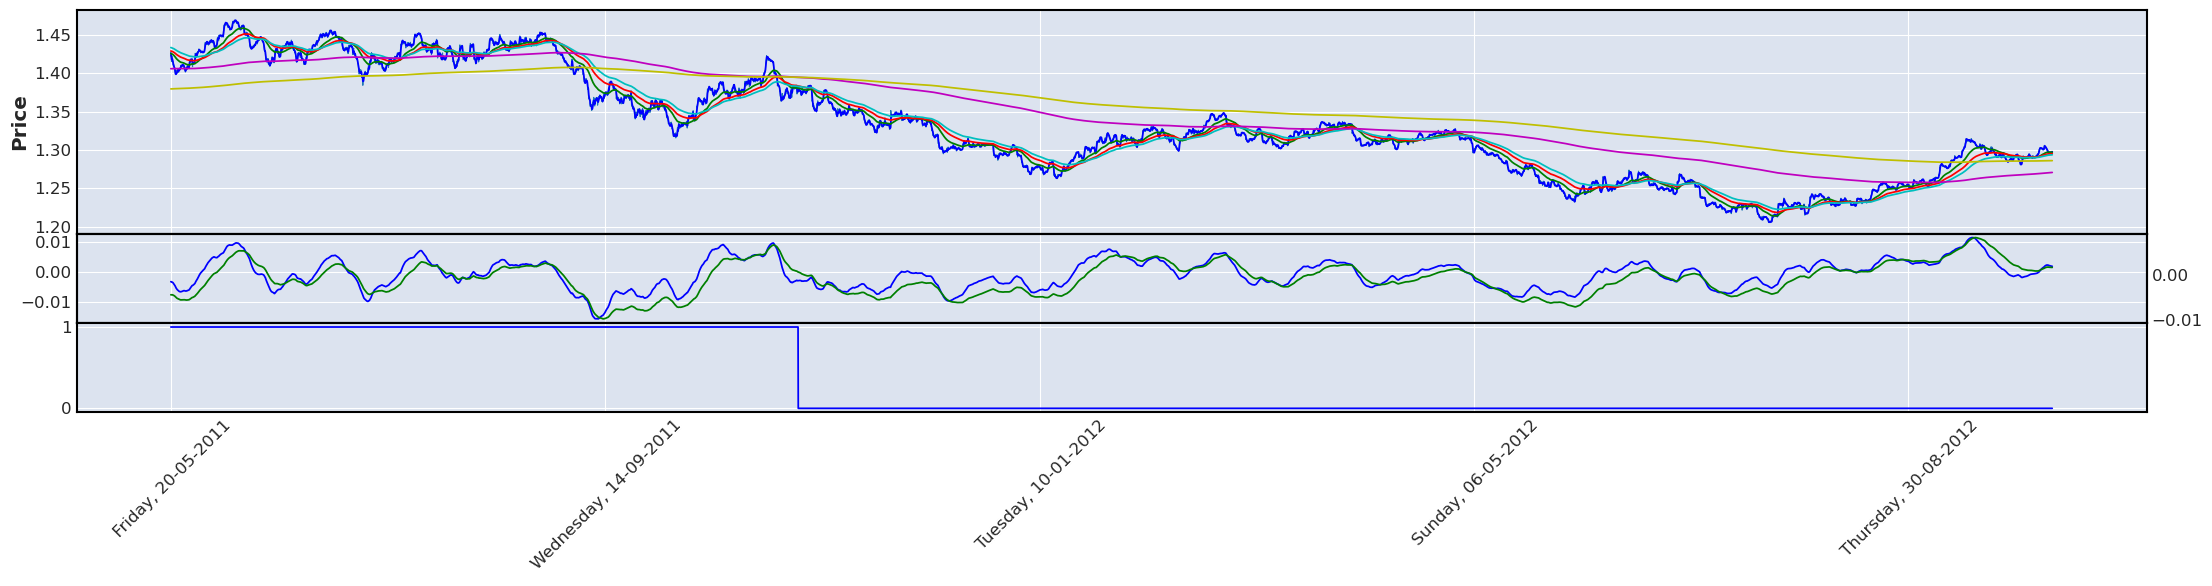

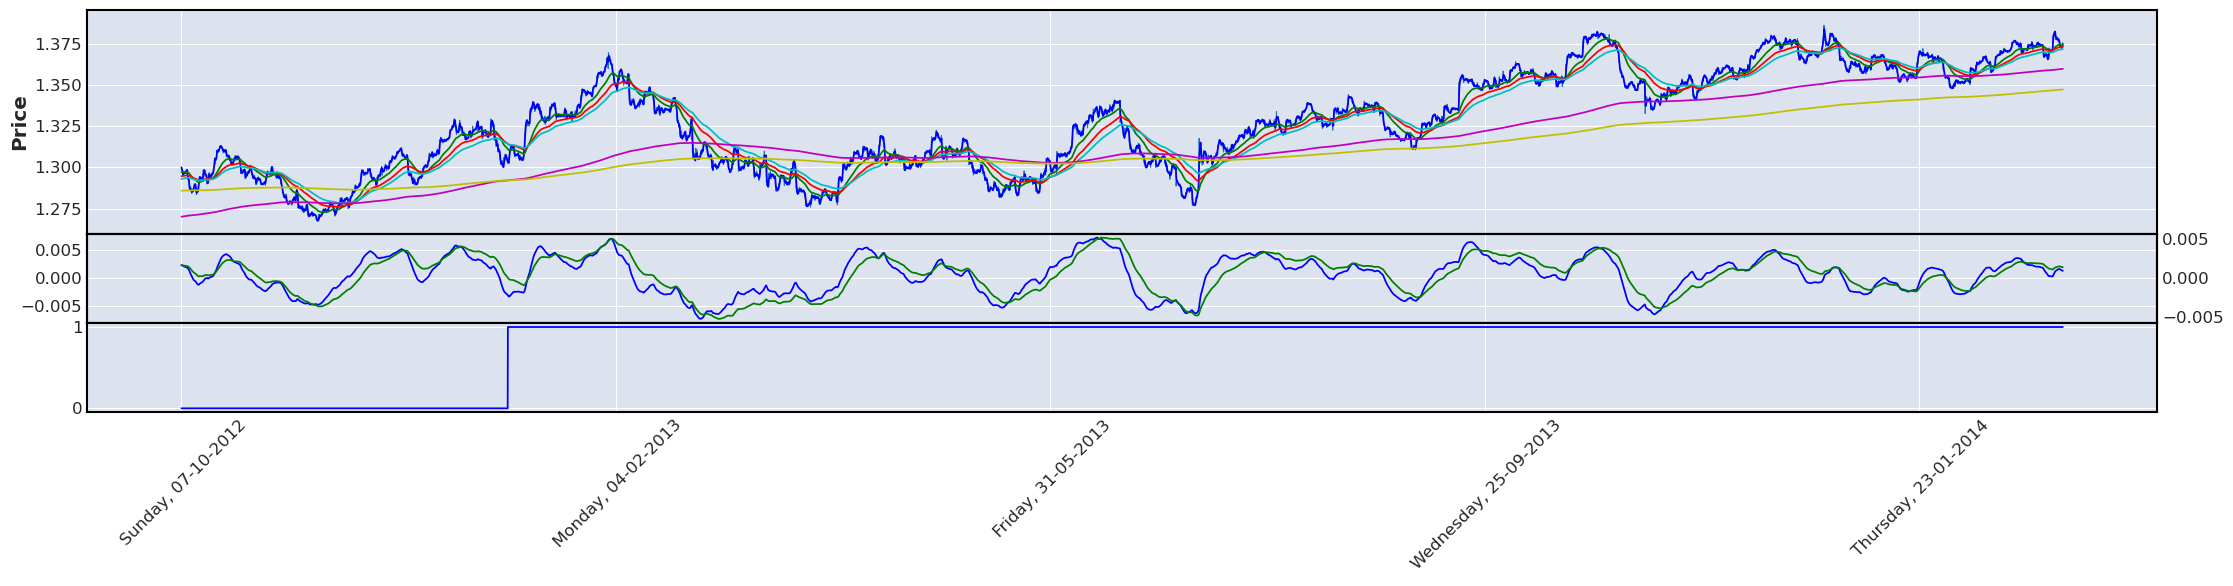

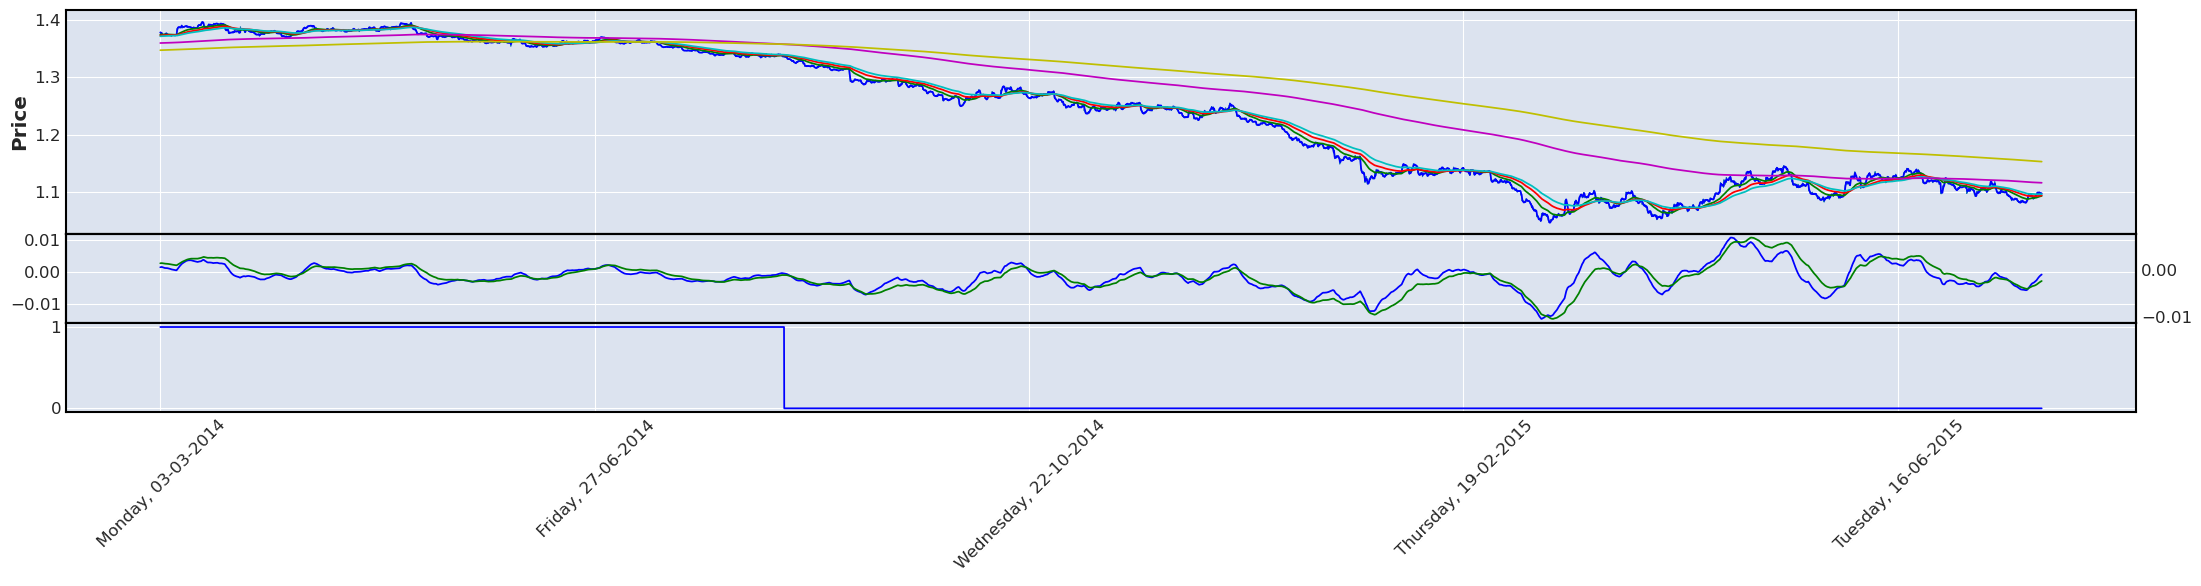

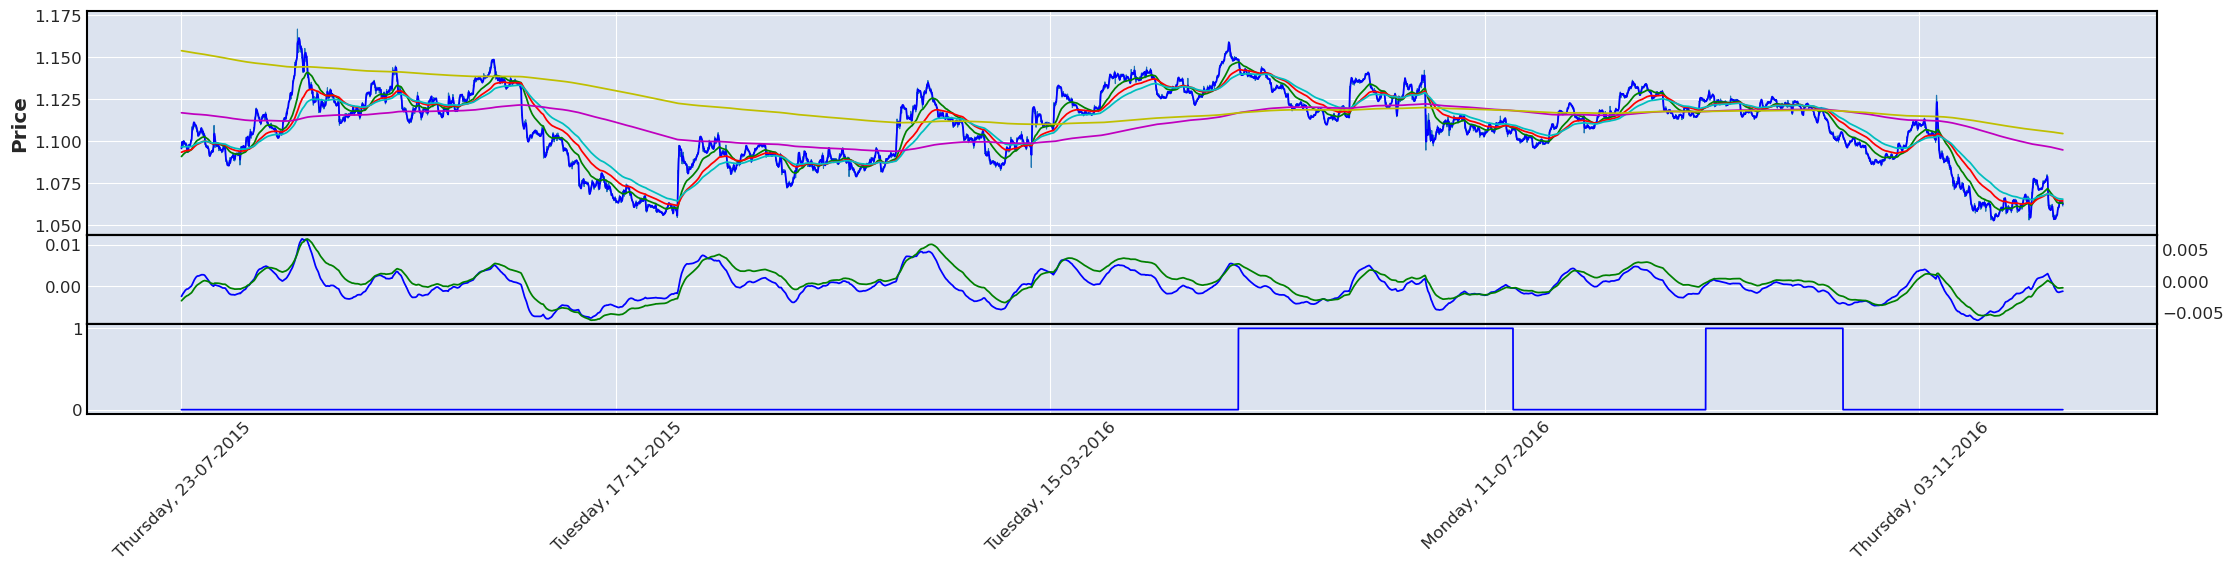

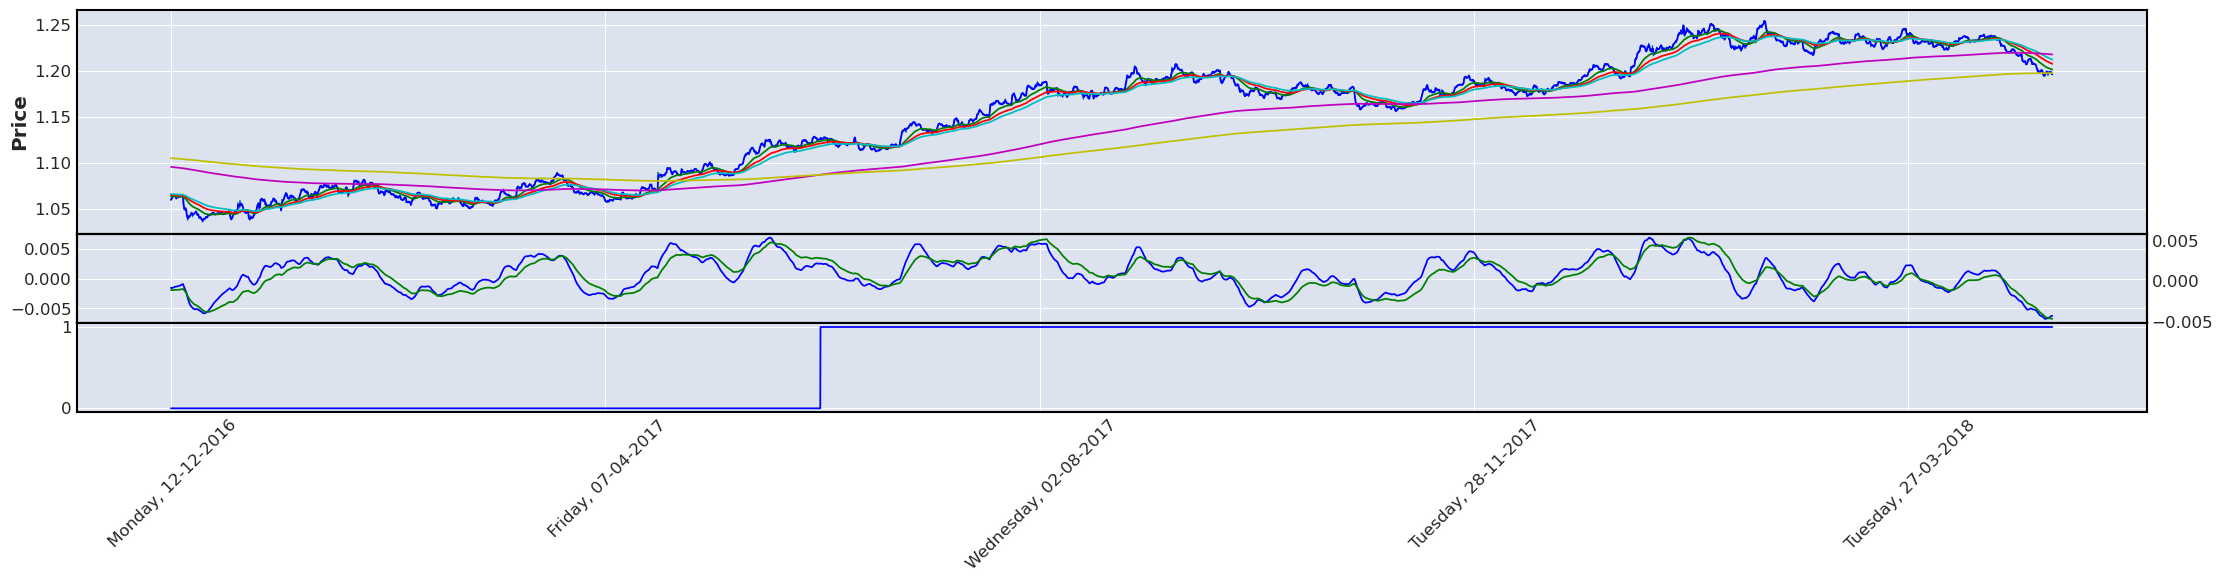

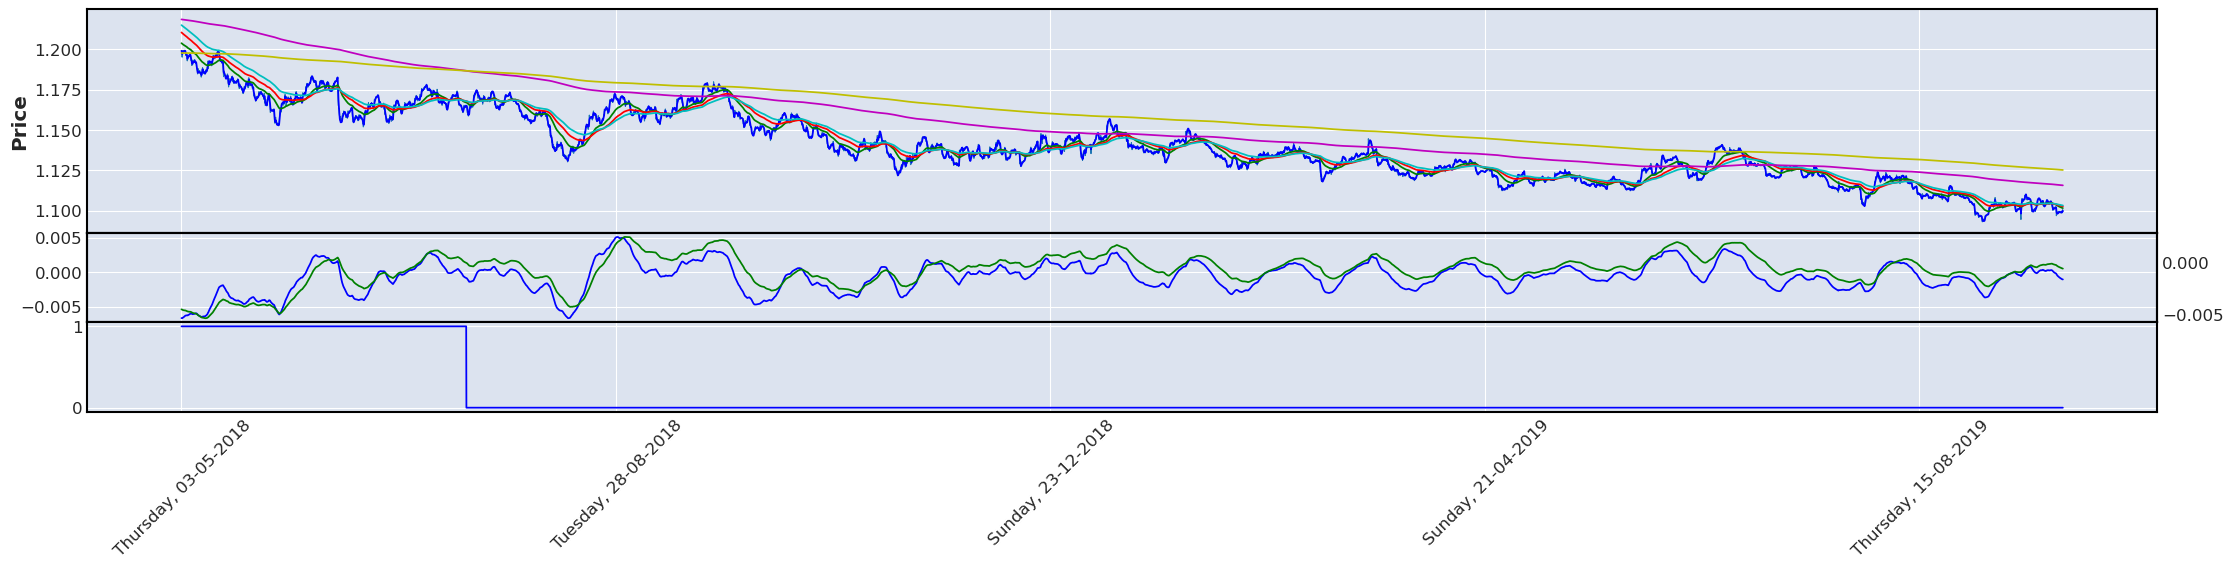

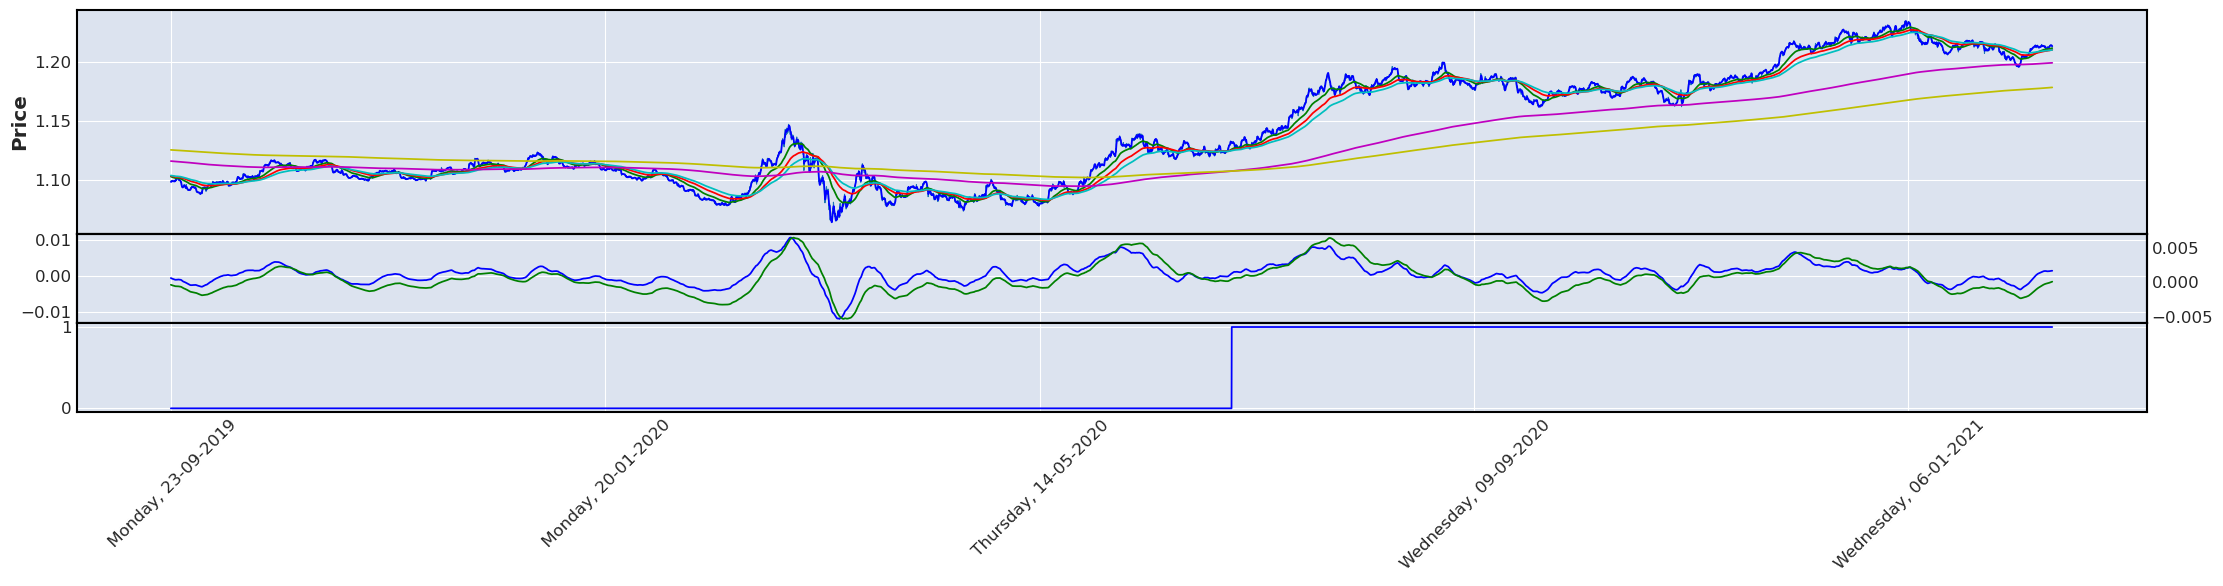

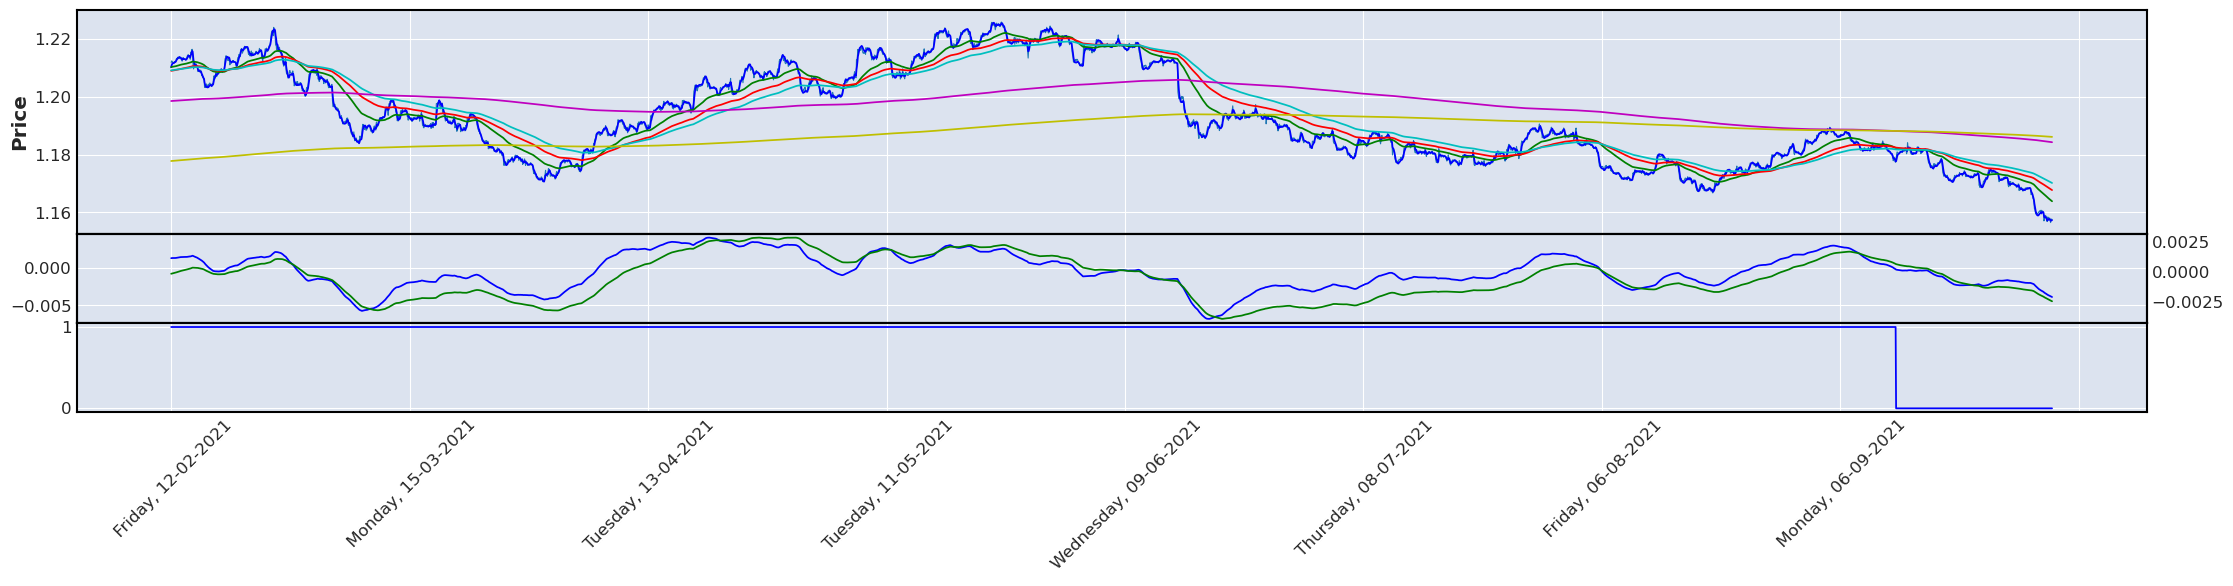

In [177]:
import mplfinance as mpf
def plotsubset(df,filename):
    colors = ['b','g','r','c','m','y','k','w']
    #print(len(dataset.raw))
    #print(len(df))
    apds = [
            mpf.make_addplot(df[dataHset.indicators[i].__name__],panel=0,color=colors[i])
            for i in range(len(dataHset.indicators))
        ] + [
            mpf.make_addplot(df['ema100']-df['ema200'],panel=1,color='b'),
            mpf.make_addplot(df['ema200']-df['ema300'],panel=1,color='g'),
        ] + [
            mpf.make_addplot(df['ema2400']-df['ema4800']>0,panel=2,color='b'),
        ]

    # fig, axes = mpf.plot(df,addplot=apds,figscale=14,volume=False, returnfig=True)
    fig, axes = mpf.plot(
        df,
        type = 'line', 
        figratio=(250,50),
        datetime_format=' %A, %d-%m-%Y',
        volume=False,
        returnfig=True,
        addplot=apds,
        )#savefig = "./"+str(i)+".png")#addplot=apds,figratio=(10,5),volume=False, returnfig=True)

raw = dataHset.raw#.dropna()
#print(raw.head())
for i in range(0,20):
    #print(i)
    if (i+1)*24*30*12<len(raw):
        df = raw.iloc[i*24*30*12:((i+1)*24*30*12+(24))]
        plotsubset(df,"H"+str(i))
    else:
        df = raw.iloc[i*24*30*12:]
        plotsubset(df,"H"+str(i))
        break

In [130]:
import mplfinance as mpf
def plotsubset(df,filename):
    colors = ['b','g','r','c','m','y','k','w']
    #print(len(dataset.raw))
    #print(len(df))
    apds = [
            mpf.make_addplot(df[dataset.indicators[i].__name__],panel=0,color=colors[i])
            for i in range(len(dataset.indicators))
        ] + [
            mpf.make_addplot(df['ema120']-df['ema180'],panel=1,color='b'),
            mpf.make_addplot(df['ema180']-df['ema300'],panel=1,color='g'),
        ] + [
            mpf.make_addplot(df['ema144000']-df['ema288000']>0,panel=2,color='b'),
        ]

    # fig, axes = mpf.plot(df,addplot=apds,figscale=14,volume=False, returnfig=True)
    fig, axes = mpf.plot(
        df,
        type = 'line', 
        figratio=(250,50),
        datetime_format=' %A, %d-%m-%Y',
        volume=False,
        returnfig=True,
        addplot=apds,
        savefig = "./"+str(i)+".png")#addplot=apds,figratio=(10,5),volume=False, returnfig=True)
for i in range(0,20):
    if (i+1)*60*24*30*12<len(dataset.raw):
        df = dataset.raw.iloc[i*60*24*30*12:(i+1)*60*24*30*12+(60*24)]
        plotsubset(df,str(i))
    else:
        df = dataset.raw.iloc[i*60*24*30*12:]
        plotsubset(df,str(i))
        print(i)
        break

8


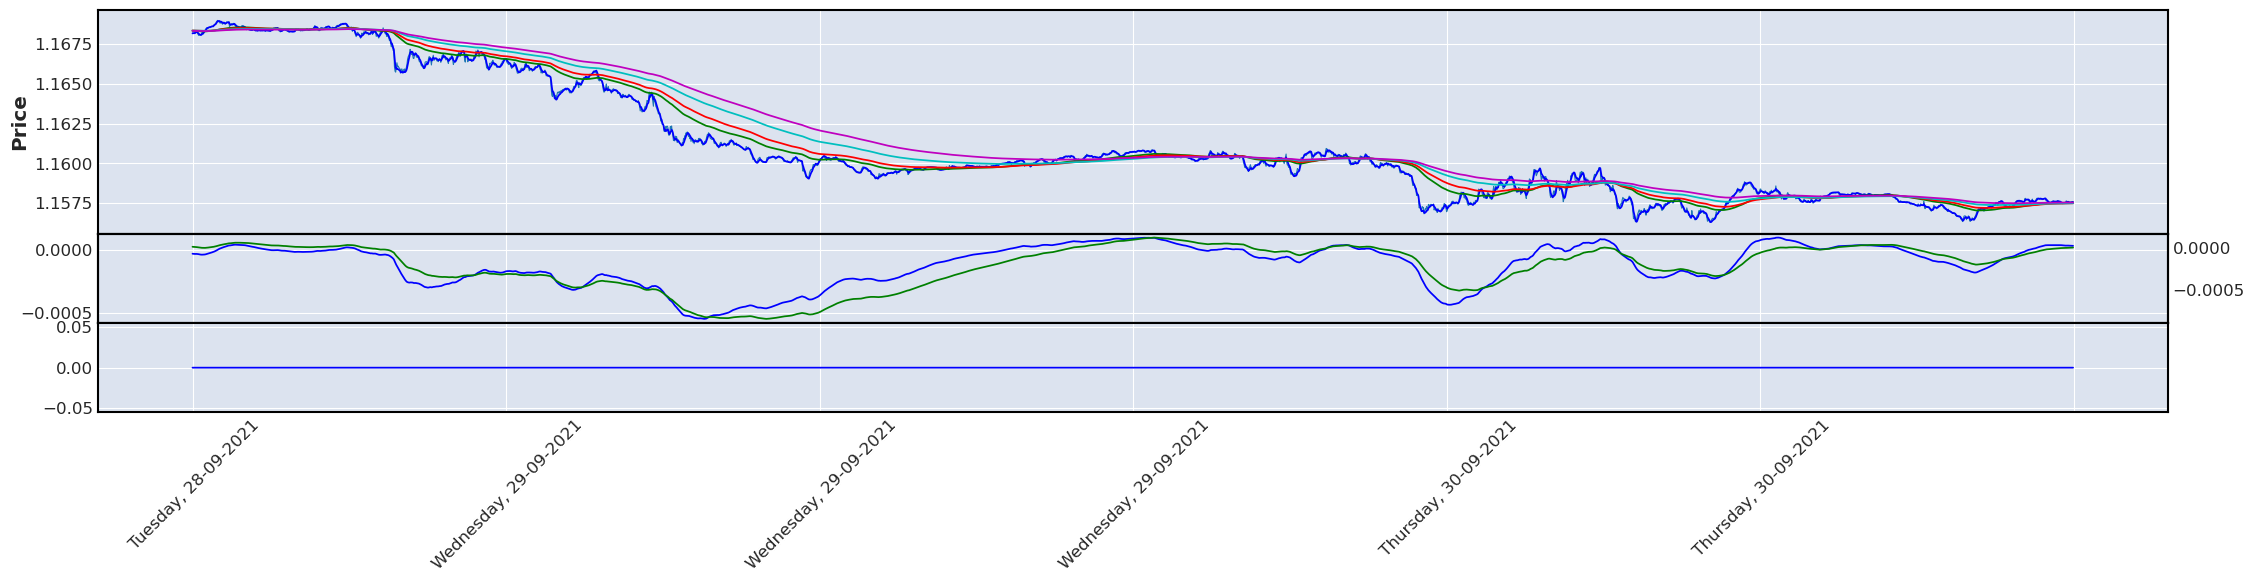

In [18]:
import mplfinance as mpf
colors = ['b','g','r','c','m','y','k','w']
#print(len(dataset.raw))
#print(len(df))
df = dataset.raw[-3000:]
apds = [
        mpf.make_addplot(df[dataset.indicators[i].__name__],panel=0,color=colors[i])
        for i in range(len(dataset.indicators)-2)
    ] + [
        mpf.make_addplot(df['ema120']-df['ema180'],panel=1,color='b'),
        mpf.make_addplot(df['ema180']-df['ema300'],panel=1,color='g'),
    ] + [
        mpf.make_addplot(df['ema144000']-df['ema288000']>0,panel=2,color='b'),
    ]

# fig, axes = mpf.plot(df,addplot=apds,figscale=14,volume=False, returnfig=True)
fig, axes = mpf.plot(df,type = 'line', figratio=(250,50),datetime_format=' %A, %d-%m-%Y',volume=False, returnfig=True,addplot=apds)#addplot=apds,figratio=(10,5),volume=False, returnfig=True)


In [ ]:
import pandas as pd
import numpy as np
d = np.zeros(len(dataset.raw))
d.fill(np.nan)
d[-100:] = 1
#d[-200:-150] = 1
stub = pd.Series(
    d,
    index = dataset.raw.index
)
stub

In [ ]:
import mplfinance as mpf

df = dataset.raw.iloc[-60*24:]
colors = ['b','g','r','c','m','y','k','w']
print(len(dataset.raw))
print(len(df))
apds = [
        mpf.make_addplot(df[dataset.indicators[i].__name__],panel=0,color=colors[i])
        for i in range(len(dataset.indicators)-2)
    ] + [
        #mpf.make_addplot(df['ema120']-df['ema180'],panel=1,color='b'),
        #mpf.make_addplot(df['ema180']-df['ema300'],panel=1,color='g'),
        mpf.make_addplot(stub[-60*24:],panel=1),
    ] + [
        mpf.make_addplot(df['ema144000']-df['ema288000']>0,panel=2,color='b'),
    ]

# fig, axes = mpf.plot(df,addplot=apds,figscale=14,volume=False, returnfig=True)
fig, axes = mpf.plot(df,type = 'line', figratio=(250,50),datetime_format=' %A, %d-%m-%Y',volume=False, returnfig=True,addplot=apds)#addplot=apds,figratio=(10,5),volume=False, returnfig=True)

In [5]:
dataset.raw.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'dema9', 'dema9D1', 'dema9D2',
       'ema120', 'ema120D1', 'ema120D2', 'ema180', 'ema180D1', 'ema180D2',
       'ema300', 'ema300D1', 'ema300D2', 'ema420', 'ema420D1', 'ema420D2',
       'ema144000', 'ema144000D1', 'ema144000D2', 'ema288000', 'ema288000D1',
       'ema288000D2', 'Close_dema9', 'dema9_ema120', 'dema9D1_ema120D1',
       'dema9D2_ema120D2', 'ema120_ema180', 'ema120D1_ema180D1',
       'ema120D2_ema180D2', 'ema180_ema300', 'ema180D1_ema300D1',
       'ema180D2_ema300D2', 'ema300_ema420', 'ema300D1_ema420D1',
       'ema300D2_ema420D2', 'ema420_ema144000', 'ema420D1_ema144000D1',
       'ema420D2_ema144000D2', 'ema144000_ema288000',
       'ema144000D1_ema288000D1', 'ema144000D2_ema288000D2', '_y_enter_exit'],
      dtype='object')

In [29]:
import matplotlib.pyplot as plt
import numpy as np
def HistGivenInd(price,ind,indclass):
    for i in indclass:
        subset = price[ind == i][100:]
        print(np.mean(subset))
        print(np.var(subset))
        print(np.quantile(subset,np.array([0.4,0.6])))
        #plt.figure(i)
        #plt.hist(subset,bins = 1000)
HistGivenInd(
    dataset.raw['dema9D1'],
    #dataset.raw[dataset.indicators[-2].__name__]-dataset.raw[dataset.indicators[-1].__name__]>0,
    dataset.raw["ema120"]-dataset.raw["ema420"]>0,
    [0,1]
)

-4.026877599890972e-07
8.703260894902932e-09
[-1.01616973e-05  1.24523377e-05]
2.7274403676936836e-07
8.609769324789973e-09
[-1.20449140e-05  1.02042981e-05]


In [109]:
import numba
import numpy as np
@numba.jit(nopython = True)
def minuteTillMaxMean(pricearr,binaryInd):
    #store: class, startInd, endInd, maxInd, diff 
    store = np.zeros( (int(len(pricearr)/3),5) )
    store.fill(np.nan)

    entrycount = 0
    
    startidx = -1
    
    sign = np.nan
    #amendsign = np.nan
    maxidx = -1
    temp = np.nan
    for i in range(len(pricearr)):
        if not np.isnan(binaryInd[i]) and not np.isnan(pricearr[i]):            
            if binaryInd[i] != sign:
                if startidx!=-1:
                    #store[entrycount,:] = np.array([sign,startidx,i-1, maxidx, pricearr[maxidx]-pricearr[startidx]])
                    store[entrycount-1,0] = sign
                    store[entrycount-1,1] = startidx
                    store[entrycount-1,2] = i-1
                    store[entrycount-1,3] = maxidx
                    store[entrycount-1,4] = pricearr[maxidx]-pricearr[startidx]
                    #print(store[entrycount])
                if i == 0:
                    print("@ 0")
                startidx = i
                maxidx =  i
                entrycount += 1
                sign = binaryInd[i]
                #amendsign = (sign-0.5)*2
            else:
                if not np.isnan(sign):
                    if (pricearr[i]-pricearr[maxidx])*sign>0:
                    #temp = (pricearr[i]-pricearr[maxidx])*sign
                    #if temp>0:
                        maxidx = i
    return store, entrycount
#len(dataset.raw)
ind = np.sign((dataset.raw["ema120"]-dataset.raw["ema420"]).to_numpy()) 
stat, count = minuteTillMaxMean(
    dataset.raw['dema9D1'].to_numpy(), 
    ind
)

-0.00023916481910871276
[-0.00093965  0.        ]
-------------------------------
0.0002571541481789231
[0.         0.00098986]
-------------------------------
-------------------------------
132.25733709169293
[  1.  17.  48. 126. 360.]
0.23263140441054553


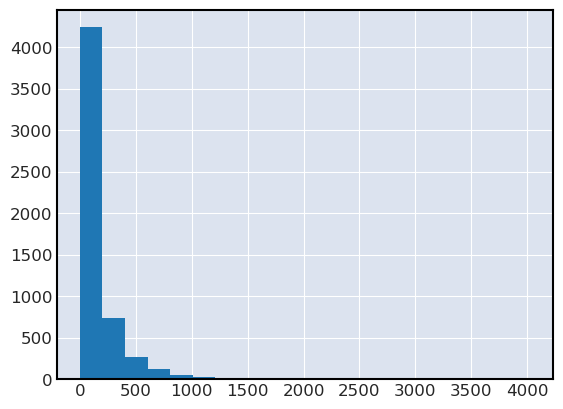

357.20792571712815
[ 25.  97. 220. 419. 886.]
0.006798209252196982


In [125]:
#stat[0:10,:]

# diff stat
subset = stat[stat[:,0]==-1,-1]
print(np.mean(subset))
print(np.quantile(subset,np.array([0.025,0.975]) ))
print("-------------------------------")
subset = stat[stat[:,0]==1,-1]
print(np.mean(subset))
print(np.quantile(subset,np.array([0.025,0.975]) ))
print("-------------------------------")
print("-------------------------------")

# duration stat: maxidx - startidx
subset = stat[stat[:,0]==-1,3]-stat[stat[:,0]==-1,1]
print(np.mean(subset))
print(np.quantile(subset,np.array([0.1,0.3,0.5,0.7,0.9]) ))
print(np.sum(subset<10)/len(subset))
subsubset = subset[subset>0]
import matplotlib.pyplot as plt
plt.figure(0)
plt.hist(subsubset,bins = 20)
plt.show()
#duration stat: (endidx - startidx)
subset = stat[stat[:,0]==-1,2]-stat[stat[:,0]==-1,1]
print(np.mean(subset))
print(np.quantile(subset,np.array([0.1,0.3,0.5,0.7,0.9]) ))
print(np.sum(subset==0)/len(subset))

# duration stat: (max-start)/ (endidx - startidx)
#subset = (stat[stat[:,0]==-1,3]-stat[stat[:,0]==-1,1]) / (stat[stat[:,0]==-1,2]-stat[stat[:,0]==-1,1])
#print(np.mean(subset))
#print(np.quantile(subset,np.array([0.2,0.8]) ))
#print(np.sum(subset<10)/len(subset))